In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [147]:
url = 'E:\\Dessertation\\desertion_dkit_msc_2022_sep\\output.csv'
# df = pd.read_csv(url, index_col = 'year', parse_dates=True, infer_datetime_format=True)
df1 = pd.read_csv(url)
df1 = df1.set_index('year')
print(df1.shape)  # (123, 8)
df1.head()

(13276, 27)


,country,sex,age,suicides,population,sucid_in_hundredk,country-year,yearly_hdi,yearly_gdp,gdp_per_capita,...,legalrights,laborforcetotal,lifeexpectancy,mobilesubscriptionsp100,refugees,selfemployed,electricityacess,secondarycompletion,continent,country_code
year,,,,,,,,,,,,,,,,,,,,,
1985,Argentina,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,3264,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1985,Argentina,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,3264,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1985,Argentina,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,3264,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1985,Argentina,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,3264,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG
1985,Argentina,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,3264,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Americas,ARG


In [148]:
df1.columns

Index(['country', 'sex', 'age', 'suicides', 'population', 'sucid_in_hundredk',
       'country-year', 'yearly_hdi', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physiciansp1000',
       'legalrights', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptionsp100', 'refugees', 'selfemployed',
       'electricityacess', 'secondarycompletion', 'continent', 'country_code'],
      dtype='object')

In [149]:
df = df1[(df1.country == 'Russian Federation')]
columns = ['sucid_in_hundredk','gdp_per_capita','lifeexpectancy','expenses']
df = pd.DataFrame(df1, columns=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13276 entries, 1985 to 2015
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sucid_in_hundredk  13276 non-null  float64
 1   gdp_per_capita     13276 non-null  int64  
 2   lifeexpectancy     13276 non-null  float64
 3   expenses           12124 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 518.6 KB


In [150]:
# adding all deaths together and group by year
df = df.groupby(['year'])['sucid_in_hundredk','gdp_per_capita','lifeexpectancy','expenses'].transform('sum')
# df = df.reset_index().drop_duplicates()
# df = pd.Series.to_frame(df)

# df['year'] = pd.to_datetime(df['year'], format='%Y00%').apply(lambda x: x.strftime('%Y'))
df['year'] = list(df.index)
df = df.drop_duplicates()
df = df.drop(labels='year', axis=1)
df.tail(10)

<ipython-input-150-adde1a2a424f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['year'])['sucid_in_hundredk','gdp_per_capita','lifeexpectancy','expenses'].transform('sum')


,sucid_in_hundredk,gdp_per_capita,lifeexpectancy,expenses
year,,,,
2007,5943.61,14148912,35863.404292,12513.078840
2008,6011.15,15385368,35975.043512,13552.344522
2009,5867.99,13687092,36106.946342,14648.462122
2010,5800.77,14294664,36232.397268,14753.526867
2011,5578.44,15867408,36426.280976,14421.829657
2012,5692.10,15338880,36497.082732,14477.960525
2013,5287.79,15735684,35764.623220,14106.150213
2014,5174.47,14550744,0.000000,0.000000
2015,4476.67,11243316,0.000000,0.000000


In [151]:
df.isnull().sum()
df.isna().sum()

sucid_in_hundredk    0
gdp_per_capita       0
lifeexpectancy       0
expenses             0
dtype: int64

In [162]:
# Replace the NaNs in column S2 & S3 by the mean of values
# in column S2 & S3 respectively
df[['lifeexpectancy','expenses']] = df[['lifeexpectancy','expenses']].fillna(value=df[['lifeexpectancy','expenses']].mean())

In [163]:
df['lifeexpectancy'] = df['lifeexpectancy'].replace(0, 
df['lifeexpectancy'].median())

df['expenses'] = df['expenses'].replace(0, 
df['expenses'].median())

In [154]:
df.isnull().sum()
df.isna().sum()

sucid_in_hundredk    0
gdp_per_capita       0
lifeexpectancy       0
expenses             0
dtype: int64

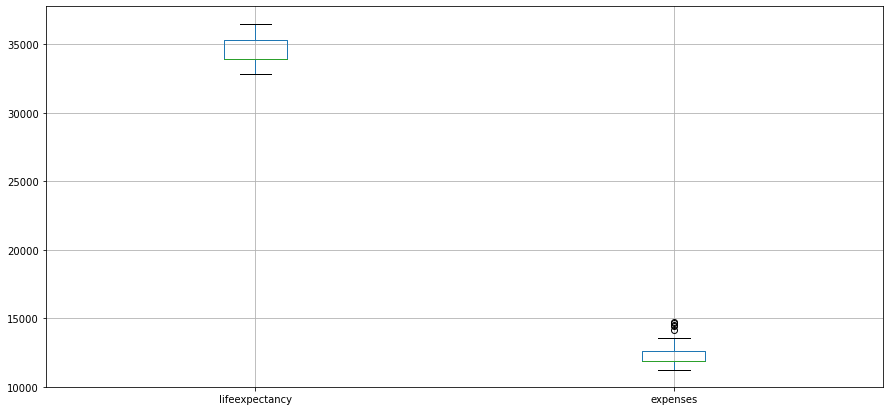

In [164]:
boxplot = df.boxplot(column=['lifeexpectancy','expenses']) 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


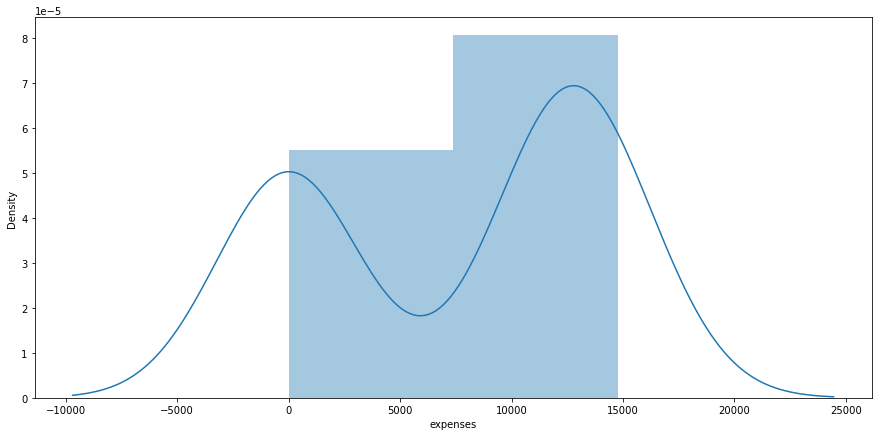

In [161]:
import seaborn as sns, numpy as np
ax = sns.distplot(df['expenses'])

In [165]:
df.head(50)

,sucid_in_hundredk,gdp_per_capita,lifeexpectancy,expenses
year,,,,
1985,3655.13,1816848,33884.505219,11857.702271
1986,3930.40,2546796,33884.505219,11857.702271
1987,5035.65,3611844,33884.505219,11857.702271
1988,4733.78,4048896,33884.505219,11857.702271
1989,5208.18,4218240,33884.505219,11857.702271
1990,6050.53,5278656,33884.505219,11857.702271
1991,6577.94,5472120,33884.505219,11857.702271
1992,6896.83,5786088,33884.505219,11857.702271
1993,6841.81,5397288,33884.505219,11857.702271


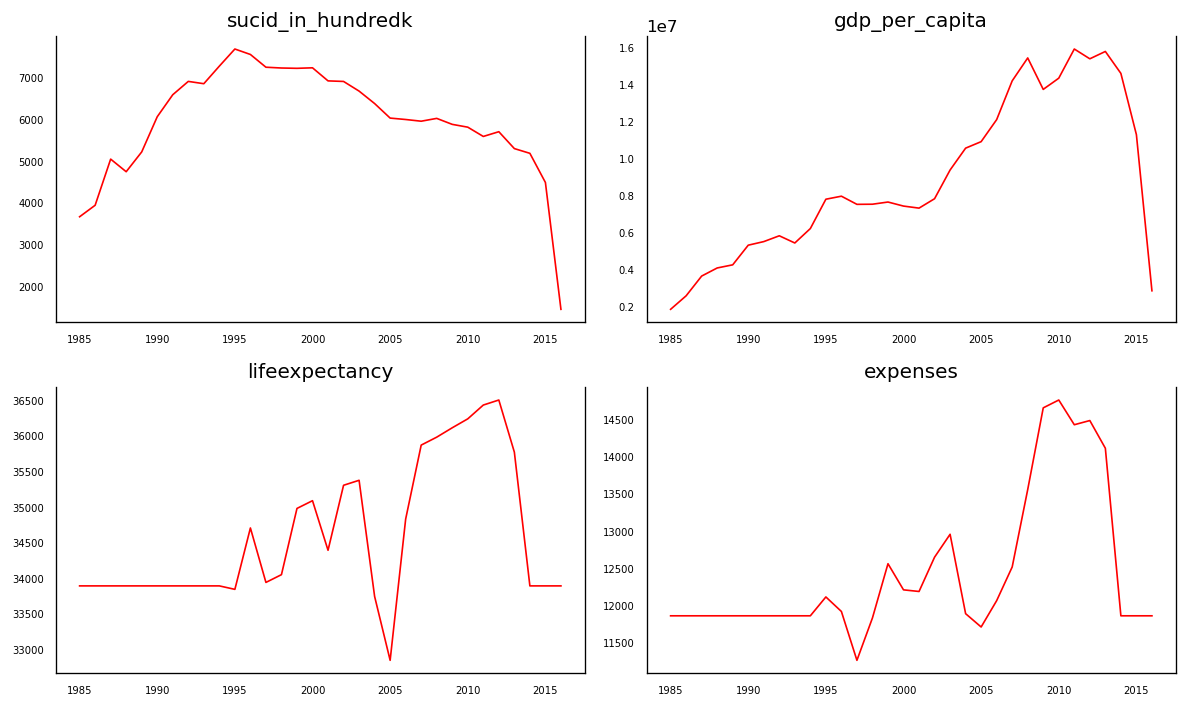

In [166]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Testing Causation using Granger’s Causality Test

In [169]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=9
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,sucid_in_hundredk_x,gdp_per_capita_x,lifeexpectancy_x,expenses_x
sucid_in_hundredk_y,1.0000,0.0,0.0000,0.0000
gdp_per_capita_y,0.0003,1.0,0.0000,0.0000
lifeexpectancy_y,0.0000,0.0,1.0000,0.0079
expenses_y,0.0000,0.0,0.0006,1.0000


If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).